## 프로젝트: 인물 모드 문제점 찾기

In [7]:
# importlib: 사용자가 파이썬의 import 시스템과 상호작용하기 위한 API를 제공하는 내장 라이브러리
# 사용자는 import 함수의 구현 내용과, 실행에 필요한 하위 함수들을 이용해 필요에 맞는 임포터를 직접 구현하거나 임포트 관련 기능들을 자유롭게 사용할 수 있음
# importlib.metadata: 설치된 패키지 메타 데이터에 대한 접근을 제공하는 라이브러리.
# 해당 코드 블럭에서는 importlib.metadata 안에 있는 version() 함수를 이용하여 pixellib 라이브러리의 버전을 확인

import cv2
import pixellib
import os
import urllib #url작업을 위한 여러 모듈로 모은 패키지
import numpy as np
from matplotlib import pyplot as plt



In [8]:
from pixellib.semantic import semantic_segmentation

## Step 1. 인물모드 직접 해 보기

#### 이미지 읽음

(1440, 1080, 3)


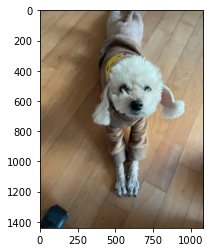

In [9]:
img_path1='./human_segmentation/images/my_dog.jpg'
img_orig=cv2.imread(img_path1)

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

(1440, 1080, 3)


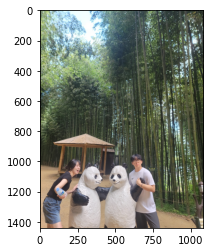

In [10]:
img_path2='./human_segmentation/images/people.jpg'
people=cv2.imread(img_path2)

print(people.shape)

plt.imshow(cv2.cvtColor(people, cv2.COLOR_BGR2RGB))
plt.show()

(1739, 1125, 3)


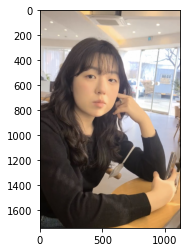

In [11]:
img_path3='./human_segmentation/images/my_image.PNG'
person=cv2.imread(img_path3)

print(person.shape)

plt.imshow(cv2.cvtColor(person, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
#piexellib에서 제공해주는 모델 다운 
model_dir='./human_segmentation/models/'

model_file=os.path.join(model_dir,'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')


# PixelLib가 제공하는 모델의 url입니다
model_url='https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

 #다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('./human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x1d845f442c8>)

In [13]:
#세그멘테이션 모델 생성
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [14]:
segvalues1, output1 = model.segmentAsPascalvoc(img_path1)
segvalues2, output2 = model.segmentAsPascalvoc(img_path2)
segvalues3, output3 = model.segmentAsPascalvoc(img_path3)

 # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

In [15]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

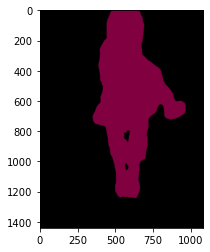

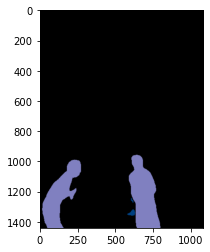

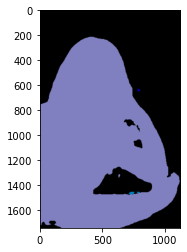

In [16]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output1)
plt.show()

plt.imshow(output2)
plt.show()

plt.imshow(output3)
plt.show()

In [17]:
segvalues1 # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력
segvalues2
segvalues3

{'class_ids': array([ 0,  9, 11, 15], dtype=int64),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [18]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues1['class_ids']:
    print(LABEL_NAMES[class_id])
print("----------------------------------")
for class_id in segvalues2['class_ids']:
    print(LABEL_NAMES[class_id])
print("----------------------------------")
for class_id in segvalues3['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog
----------------------------------
background
person
sheep
----------------------------------
background
chair
diningtable
person


In [19]:
#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [20]:
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

In [21]:
colormap[12] #컬러맵 12 강아지

array([ 64,   0, 128])

In [22]:
seg_color = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

In [23]:
seg_color_dog = (128,0,64) 

(1440, 1080)


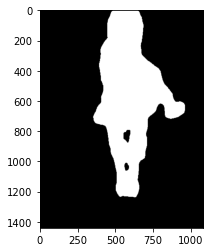

(1440, 1080)


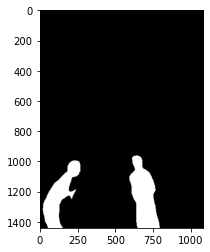

(1739, 1125)


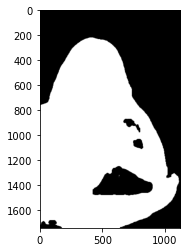

In [24]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map1 = np.all(output1==seg_color_dog, axis=-1)  #강아지 세그 컬러 적용
print(seg_map1.shape) 
plt.imshow(seg_map1, cmap='gray')
plt.show()

seg_map2 = np.all(output2==seg_color, axis=-1) 
print(seg_map2.shape) 
plt.imshow(seg_map2, cmap='gray')
plt.show()

seg_map3 = np.all(output3==seg_color, axis=-1) 
print(seg_map3.shape) 
plt.imshow(seg_map3, cmap='gray')
plt.show()

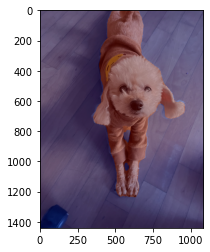

In [25]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show1 = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask1 = seg_map1.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask1 = cv2.applyColorMap(img_mask1, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show1 = cv2.addWeighted(img_show1, 0.6, color_mask1, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB))
plt.show()

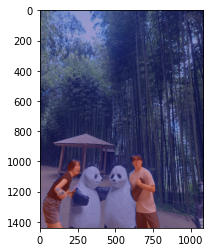

In [26]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show2 =people.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask2 = seg_map2.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask2 = cv2.applyColorMap(img_mask2, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show2 = cv2.addWeighted(img_show2, 0.6, color_mask2, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB))
plt.show()

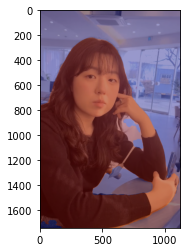

In [27]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show3 = person.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask3 = seg_map3.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask3 = cv2.applyColorMap(img_mask3, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show3 = cv2.addWeighted(img_show3, 0.6, color_mask3, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGB))
plt.show()

#### 블러

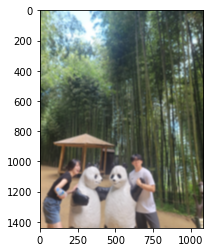

In [28]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
people_blur = cv2.blur(people, (13,13))

 
plt.imshow(cv2.cvtColor(people_blur, cv2.COLOR_BGR2RGB))
plt.show()

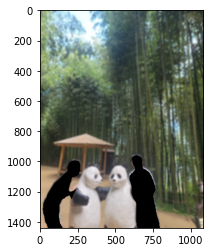

In [29]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask2, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(people_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

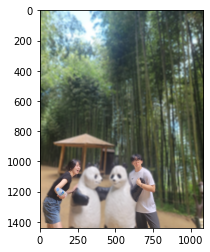

In [30]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, people, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

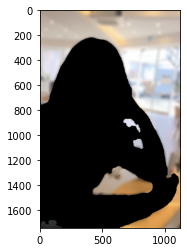

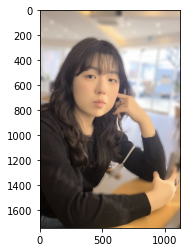

In [34]:
person_blur = cv2.blur(person, (30,30)) #커널 사이즈를 변경하여 배경 블러를 강화했습니다.
plt.imshow(cv2.cvtColor(person_blur, cv2.COLOR_BGR2RGB))

img_mask_color1 = cv2.cvtColor(img_mask3, cv2.COLOR_GRAY2BGR)
img_bg_mask1 = cv2.bitwise_not(img_mask_color1)
img_bg_blur1 = cv2.bitwise_and(person_blur, img_bg_mask1)
plt.imshow(cv2.cvtColor(img_bg_blur1, cv2.COLOR_BGR2RGB))
plt.show()

img_concat1 = np.where(img_mask_color1==255, person, img_bg_blur1)
plt.imshow(cv2.cvtColor(img_concat1, cv2.COLOR_BGR2RGB))
plt.show()


#### 크로마키 및 배경 처리

강아지 사진을 다른 곳에 합성해보겠습니다.

(1440, 1080, 3)


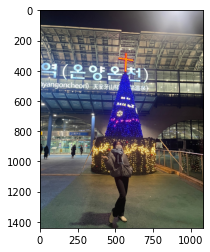

In [31]:
# 배경이 될 사진 가져오기
img_path1='./back.jpg'
back=cv2.imread(img_path1)

print(back.shape)

plt.imshow(cv2.cvtColor(back, cv2.COLOR_BGR2RGB))
plt.show()

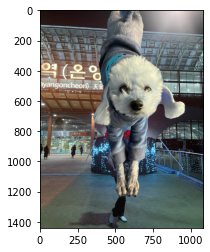

In [32]:

s=cv2.copyTo(img_orig,img_mask1,back)

plt.imshow(s)

plt.show()

https://computistics.tistory.com/34

사이즈가 같아야해서 배경이 가로여서 안됬다가 세로로 바꿨씁니다

와! 온양온천 크리스마스 트리를 같이 보고 싶은 마음이였는데 저희 강아지와 같이 볼 수 있게 되었습ㄴ니다 ㅋ

## Step 2. 사진에서 문제점 찾기

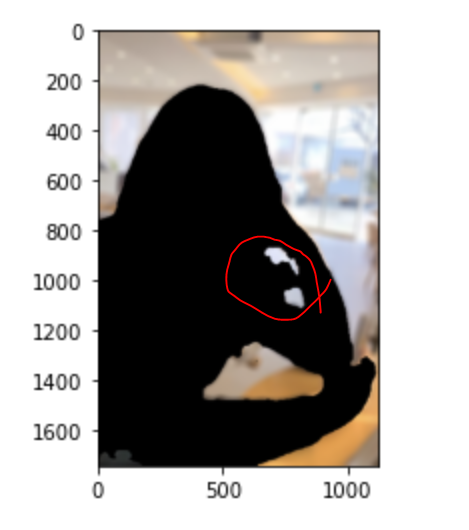
동그라미 친 부분을 보면 마스크가 제대로 배경과 구별 되지 않음을 볼 수 있습니다. 블러 처리가 배경과 완벽히 구별되지 않습니다.

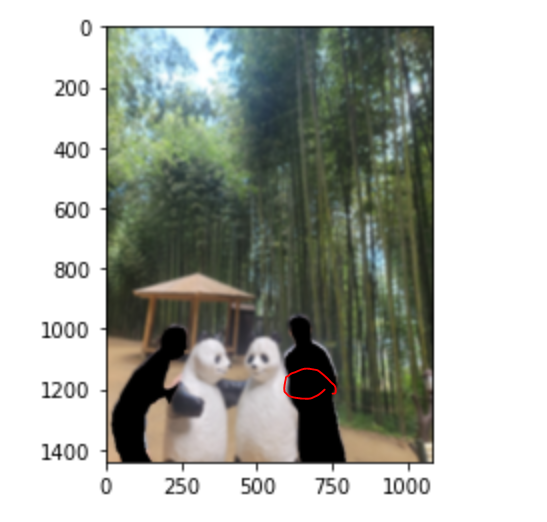
동그라미 친 부분 판다와 손을 잡고 있는 부분이 제대로 구별 되지 않음을 알 수 있습니다. 블러 처리가 세심하게 이루어지지 않았습니다.

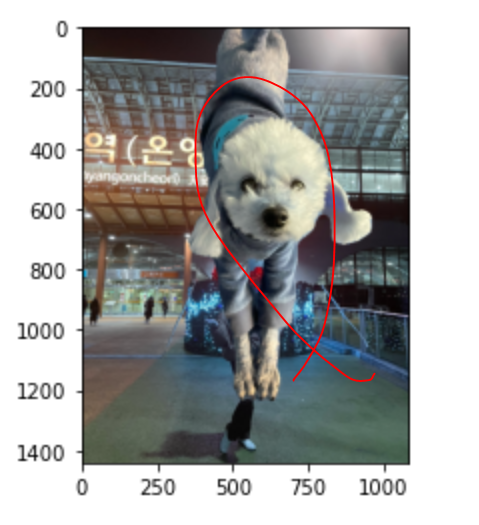
이건 제가 이미지를 rgb 처리를 안해서 그런듯..
근데 강아지 누끼 자체는 깔끔하게 따졌어용

## Step 3. 해결 방법을 제안해 보기

구글에서 제안한 IR 카메라를 이용해 UPDEPTH를 측정하는 방법은 좋아보입니다. 하지만 실시간으로 적외선 센서를 이용해 온도 차를 활용한 깊이 측정이기 떄문에 실시간 측정에서만 적용된다는 점이 있을 것 같습니다. 

실시간 촬영시 인물모드의 문제점을 해결하기 위해서 

1. 조리개 동시 사용하기
- 인물 모드 촬영시 조리개를 통해 배경이 적당히 블러 처리 되게 하기 
- 블러가 되지 않은 부분은 human_segmetaion 기능으로 처리하기 

2. 가속도 센서 사용하기
- 아이폰 같은 경우에는 라이브 포토라는 기능이 있습니다. 사진이지만 동영상이 짧게 저장되는 기능인데요 
이 기능을 이용해서 흔들린 부분이 겹치는 것은 인물, 어느 정도 흔들림이 없는 경우는 사물로 분류해도 되지 않을까요? 물론 손떨림에 의해 사물과 사람 모두 흔들리겠지만 사람은 완전히 정지해있는 것이 아니기 때문에 기본 손떨림 흔들림 외 추가적인 흔들림이 있는 경우에는 인간이라고 판단을 할 수 도 있을 것 같습니다. 
물론 이 기능을 주로 하는게 아니라 부가적으로 사용되어야 할 것 같네요.

3. 포토샵에 사용되는 객체 분리 기능 활용하기
어도비 같은 포토샵에서 이미 객체 분리 기능이 사용되고 있습니다. 최근에 아이폰 소포트웨어가 업데이트되면서 자동으로 배경을 제거해주는 기능이 업데이트가 되긴 했지만 포토샵에 비해서는 정교하지 못한 수준입니다.
실시간 촬영에서가 아닌 위에서 수행했던 것처럼 이미 찍힌 사진에 대해 인물모드를 재현할 경우, 포토샵에서 사용되는
AI 객체 분리 기술이 사용된다면 더 정확하게 인물 모드가 재현될 것 같습니다.



